In [251]:
#EECS4404 Niave Bayes prediction model for sentences

#import numpy as np
#import pandas as pd
import nltk
import string
#import re
#import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
#import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bartgisone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bartgisone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bartgisone/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [252]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'How was your day today?',
    'Today was a good day.',
    'Tomorrow will be good too!',
    'these are test sentences',
    'we have many tests tomorrow',
    'lets do good on our tests tomorrow'
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
Y = vectorizer.get_feature_names()



In [253]:
#lemmatization and removal of stopwords

# Import stopwords
from nltk.corpus import stopwords
# Import lemmatizer; using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

newArray = ""
stopwords_english = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
for i in Y:
    if i not in stopwords_english:
             newArray += i + " "
    else:
         pass
 
tokens = nltk.word_tokenize(newArray)
        
#print(newArray)
#print(tokens)


In [254]:
#lemmatize words
newArray = ""
for i in tokens:
    newArray += lemmatizer.lemmatize(i) + " "
#convert to Array    
newArray = nltk.word_tokenize(newArray)
#remove duplicate words
newArray = list(dict.fromkeys(newArray))

#all words should be similar by default
arrayInfo = []
for i in newArray:
    arrayInfo.append('similar')

#add random words to array for disimilar purposes

disimilarArray = ['speed', 'nothing','country', 'tool', 'frog', 'hamster', 'power', 'book', 'elf', 'identical', 'credit', 'bag', 'pear']
disimilarInfo = ['disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar','disimilar' ]

for i in disimilarArray:
    newArray.append(i)

for i in disimilarInfo:   
    arrayInfo.append(i)

#print(newArray)



In [255]:
#test = ['today', 'speed', 'egg', 'hamster','good', 'day', 'apple', 'train']
#testInfo = ['similar', 'disimilar','disimilar','disimilar', 'similar','similar', 'disimilar', 'disimilar']


corpus2 = [
    'How was your day yesterday?',
    'Eggs are a great start for any breakfast',
    'Tomorrow I will have eggs',
    'test for similarities',
    'this is a random sentence'
]
vectorizer = CountVectorizer()
X2 = vectorizer.fit_transform(corpus2)
Z = vectorizer.get_feature_names()
#print(Z)


test = ""

#get rid of all stop words
for i in Z:
    if i not in stopwords_english:
            test += i + " "
    else:
         pass

#tokenize to use lemmatizer
tokens = nltk.word_tokenize(test)

#lemmatize words
test = ""
for i in tokens:
    test += lemmatizer.lemmatize(i) + " "
#convert to Array    
test = nltk.word_tokenize(test)
#remove duplicate words
test = list(dict.fromkeys(test))

#used to see similar/disimilar words 
print(test)


#you must manually create categories (similar/disimilar)!!!

testInfo = ['disimilar','similar','disimilar','disimilar','disimilar','similar','disimilar','disimilar','similar','similar','similar',]



['breakfast', 'day', 'egg', 'great', 'random', 'sentence', 'similarity', 'start', 'test', 'tomorrow', 'yesterday']


In [256]:
#creates model and fits training data
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(newArray, arrayInfo)
print(model)
labels = model.predict(test)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])


Text(89.18, 0.5, 'predicted value')

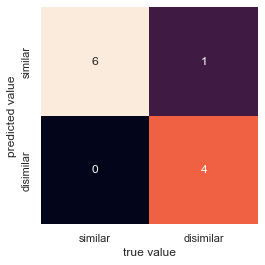

In [257]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testInfo, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['similar', 'disimilar'], yticklabels=['similar', 'disimilar'])
plt.xlabel('true value')
plt.ylabel('predicted value')